In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [22]:
data = np.array([
    [1.0, 2.0, np.nan, 4.0],
    [np.nan, 5.0, 6.0, 7.0],
    [8.0, 9.0, 10.0, np.nan],
    [11.0, np.nan, 13.0, 14.0]
])

In [23]:
def objective_function(original_data, imputed_data):
    mask = ~np.isnan(original_data)
    return np.mean((original_data[mask] - imputed_data[mask])**2)

In [24]:
population_size = 50
num_generations = 100
mutation_rate = 0.1

In [25]:
def initialize_population(data, population_size):
    population = []
    for _ in range(population_size):
        individual = np.copy(data)
        missing_indices = np.argwhere(np.isnan(data))
        for i, j in missing_indices:
            individual[i, j] = random.uniform(0, 1)  # Random imputation
        population.append(individual)
    return population

In [26]:
def crossover(parent1, parent2):
    child = np.copy(parent1)
    missing_indices = np.argwhere(np.isnan(parent1))
    for i, j in missing_indices:
        if random.random() < 0.5:
            child[i, j] = parent2[i, j]
    return child

In [27]:
def mutate(individual, mutation_rate):
    mutated_individual = np.copy(individual)
    missing_indices = np.argwhere(np.isnan(individual))
    for i, j in missing_indices:
        if random.random() < mutation_rate:
            mutated_individual[i, j] = random.uniform(0, 1)  # Random imputation
    return mutated_individual

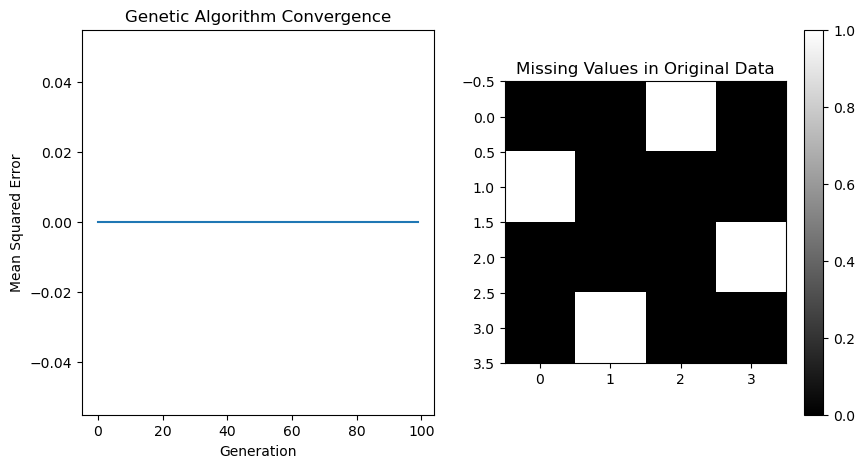

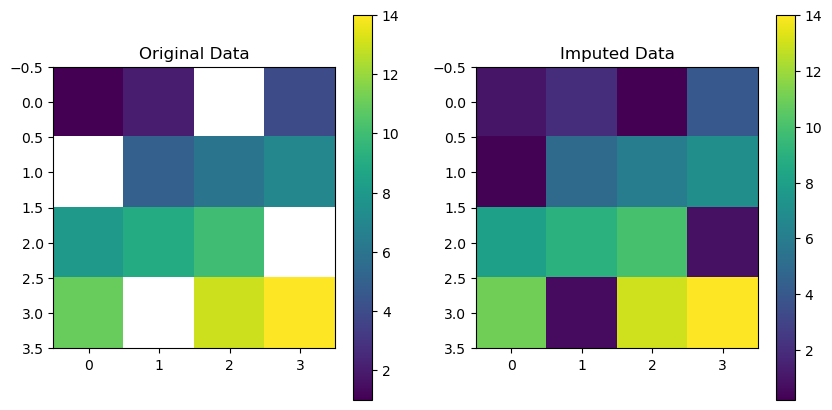

Imputed data:
[[ 1.          2.          0.20937943  4.        ]
 [ 0.27533374  5.          6.          7.        ]
 [ 8.          9.         10.          0.84342636]
 [11.          0.59056388 13.         14.        ]]


In [28]:
# Genetic algorithm
def genetic_algorithm(data, population_size, num_generations, mutation_rate):
    population = initialize_population(data, population_size)
    fitness_history = []  
    for _ in range(num_generations):
        fitness_scores = [objective_function(data, individual) for individual in population]
        fitness_history.append(min(fitness_scores))  # Store the best fitness score for this generation
        
        mating_pool = random.sample(population, k=population_size // 2)
        
        next_generation = []
        while len(next_generation) < population_size:
            parent1, parent2 = random.choices(mating_pool, k=2)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            next_generation.append(child)
        
        population = next_generation
    
    best_individual = min(population, key=lambda x: objective_function(data, x))

   
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fitness_history)
    plt.xlabel('Generation')
    plt.ylabel('Mean Squared Error')
    plt.title('Genetic Algorithm Convergence')
    
    
    plt.subplot(1, 2, 2)
    plt.imshow(np.isnan(data), cmap='gray', interpolation='nearest')
    plt.title('Missing Values in Original Data')
    plt.colorbar()
    plt.show()
    
    imputed_data = best_individual
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(data, cmap='viridis', interpolation='nearest')
    plt.title('Original Data')
    plt.colorbar()
    
    plt.subplot(1, 2, 2)
    plt.imshow(imputed_data, cmap='viridis', interpolation='nearest')
    plt.title('Imputed Data')
    plt.colorbar()
    plt.show()
    
    return imputed_data


imputed_data = genetic_algorithm(data, population_size, num_generations, mutation_rate)
print("Imputed data:")
print(imputed_data)